<a href="https://colab.research.google.com/github/tina3860/EDA-Uber-Request/blob/main/EDA_unofficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pick any ONE data set and do a complete exploratory data analysis ( EDA). The analysis should give a clear understanding of the data and the various details about the data. You can use any other data if you choose to, not bound to the data attached.

Hint: Try to come up with more than 5 questions you would like to answer based on the data and provide analysis around those question. Use visualization and pandas to explain the data.



In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

#load dataset
df = pd.DataFrame
df = pd.read_csv('/content/drive/MyDrive/School/grad/Spring 24/CPSC 5175/EDA/Uber Request Data.csv')
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**QUESTION 1**

Examine the datatypes in the dataset. Is there any variables that need to be converted or cleaned up?



**RESPONSE**

I printed basic information about the dataframe. It seems to have some null values that are relevant so we can keep those. The date columns are messy and not in the an object data type. We need to seperate the 'Request timestamp' and 'Drop timestamp' columns into date and time for Request and Drop. We also need to change the string formats to date time formats.  

In [ ]:
#print basic info of DF
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
#clean request time and drop time columns

from datetime import datetime

#seperate Request timestamp into two columns: req_date and req_time
#str.split split a string into a list of strings.t takes two argument: a separator and a maximum number of splits. The separator is the character or string that is used to split the string.

df[['req_date','req_time']] = df['Request timestamp'].str.split(' ', expand=True)
df


#seperate Drop timestamp into two columns: drop_date and drop_time
#str.split split a string into a list of strings.t takes two argument: a separator and a maximum number of splits. The separator is the character or string that is used to split the string.

df[['drop_date','drop_time']] = df['Drop timestamp'].str.split(' ', expand=True)
df


#change all the date and time columns from string types into date time format

#note: if you dont put the dayfirst parameter to be true, it will lead to this warning: <ipython-input-80-c07dfac511da>:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
#The warning message is telling you that you are trying to parse dates in the DD/MM/YYYY format, but you have not specified the dayfirst argument. By default, dayfirst is False, which means that Python will interpret the first two digits of the date as the month. If you want Python to interpret the first two digits as the day, you need to set dayfirst to True.

#pd.to_datetime converst string date times into datetime objects

df['req_date'] = pd.to_datetime(df['req_date'],dayfirst=True)
df['req_time'] = pd.to_datetime(df['req_time'],dayfirst=True)
df['drop_date'] = pd.to_datetime(df['drop_date'],dayfirst=True)
df['drop_time'] = pd.to_datetime(df['drop_time'],dayfirst=True)

df.info()

#convert dates to MM/DD/YYYY

df['req_date'] = df['req_date'].dt.strftime('%m/%d/%Y')
df['drop_date'] = df['drop_date'].dt.strftime('%m/%d/%Y')

#convert times to HH:MM am/pm
#dt.strftimeconvert datetime objects in a panda series to a specified date format
df['req_time'] = df['req_time'].dt.strftime('%I:%M %p')
df['drop_time'] = df['drop_time'].dt.strftime('%I:%M %p')


#remove 'Request timestamp' and 'Drop timestamp' columns
#df.drop used to remove rows or columns not needed or to create a new DF with specific subsets of the data
df = df.drop(columns=['Request timestamp','Drop timestamp'])

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   object        
 5   Drop timestamp     2831 non-null   object        
 6   req_date           6745 non-null   datetime64[ns]
 7   req_time           6745 non-null   datetime64[ns]
 8   drop_date          2831 non-null   datetime64[ns]
 9   drop_time          2831 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(4)
memory usage: 527.1+ KB


,Request id,Pickup point,Driver id,Status,req_date,req_time,drop_date,drop_time
0,619,Airport,1.0,Trip Completed,07/11/2016,11:51 AM,07/11/2016,01:00 PM
1,867,Airport,1.0,Trip Completed,07/11/2016,05:57 PM,07/11/2016,06:47 PM
2,1807,City,1.0,Trip Completed,07/12/2016,09:17 AM,07/12/2016,09:58 AM
3,2532,Airport,1.0,Trip Completed,07/12/2016,09:08 PM,07/12/2016,10:03 PM
4,3112,City,1.0,Trip Completed,07/13/2016,08:33 AM,07/13/2016,09:25 AM
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,07/15/2016,11:49 PM,NaN,NaN
6741,6752,Airport,NaN,No Cars Available,07/15/2016,11:50 PM,NaN,NaN
6742,6751,City,NaN,No Cars Available,07/15/2016,11:52 PM,NaN,NaN
6743,6754,City,NaN,No Cars Available,07/15/2016,11:54 PM,NaN,NaN


**QUESTION 2**

What is the average number of requests per day?

req_date
07/11/2016    1367
07/12/2016    1307
07/13/2016    1337
07/14/2016    1353
07/15/2016    1381
dtype: int64
1349.0


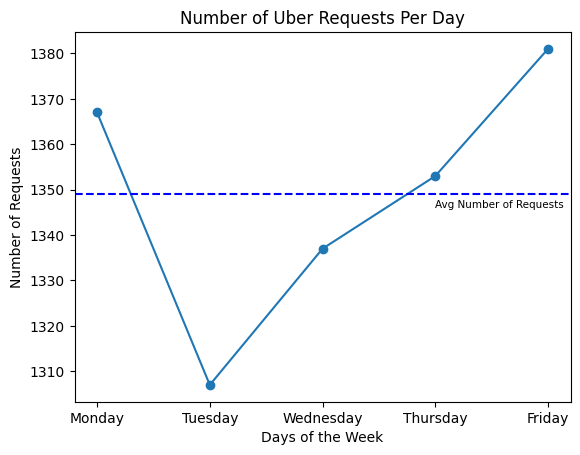

In [ ]:
#create pivot table to count num of occurences
#pivot tables are regular tables used in data analysis, reg tables are used for organization
dups = df.pivot_table(index=['req_date'],aggfunc='size')
print(dups)

#print avg
avg_num_req = dups.mean()
print(avg_num_req)

#change dates to the days of the week
#pd.to_datetime converst string date times into datetime objects
#.index.day_name changes dates to days of the week
dups.index = pd.to_datetime(dups.index)
day_names = dups.index.day_name()

#plot avg
plt.plot(day_names, dups, marker='o')
plt.axhline(y = avg_num_req, color='blue',linestyle= '--')
plt.title('Number of Uber Requests Per Day')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Requests')
plt.annotate('Avg Number of Requests',('Thursday',1346), color = 'black', size='7.5')
plt.show()

Looking at the line graph, it shows the number of request during a work week (M-F). The average number of requests is 1349 requests a day. Tuesday is the slowest day for Uber rides and leading to the weekend it gets busier.  

**QUESTION 3**

What is the overall distrubtion of each trip status (trip completed, trip cancelled,No Cars Avaialble)? Look at how the time of day or day of the week affects trip status.

distrubution of trip status per day and break it down to the hours of the day

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64


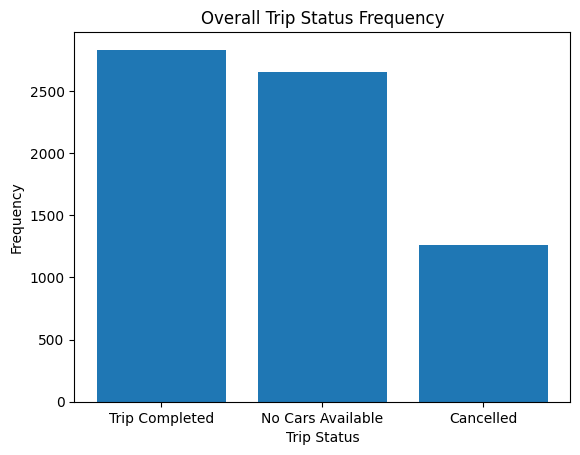

Status     Cancelled  No Cars Available  Trip Completed
Day                                                    
Friday           240                580             561
Monday           262                504             601
Thursday         252                571             530
Tuesday          240                505             562
Wednesday        270                490             577
Index(['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'], dtype='object', name='Day')
Status     Cancelled  No Cars Available  Trip Completed
Day                                                    
Monday           262                504             601
Tuesday          240                505             562
Wednesday        270                490             577
Thursday         252                571             530
Friday           240                580             561


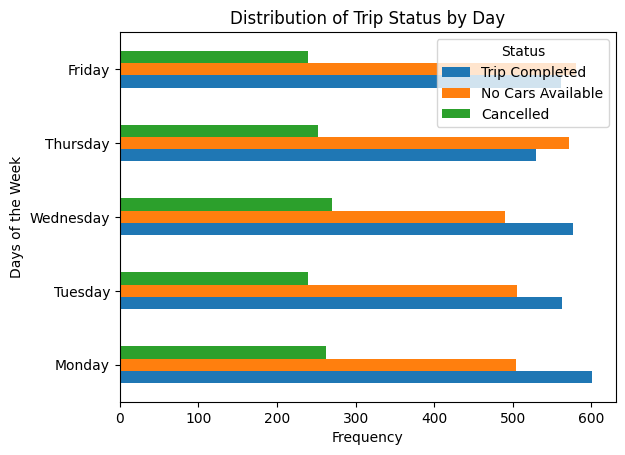

In [ ]:
#Calculate overall distribution of each trip status

df['req_date'] = pd.to_datetime(df['req_date'],format='%m/%d/%Y')
df['req_time'] = pd.to_datetime(df['req_time'],format='%I:%M %p')
df['drop_date'] = pd.to_datetime(df['drop_date'],format='%m/%d/%Y')
df['drop_time'] = pd.to_datetime(df['drop_time'],format='%I:%M %p')

  #add a new column to store the day of the week
  #dt.day_name used to get the day name from a datetime object. The function returns the name of the day of the week

df['Day']= df['req_date'].dt.day_name()

#convert dates to MM/DD/YYYY

df['req_date'] = df['req_date'].dt.strftime('%m/%d/%Y')
df['drop_date'] = df['drop_date'].dt.strftime('%m/%d/%Y')

#convert times to HH:MM am/pm

df['req_time'] = df['req_time'].dt.strftime('%I:%M %p')
df['drop_time'] = df['drop_time'].dt.strftime('%I:%M %p')

df

#count the number of occurances of each trip status by day
#value_counts() used to count the number of times each unique value appears in a Series or DataFrame. It returns a Series containing the counts of each unique value. The resulting object is in descending order, with the most frequently-occurring element first.

trip_stat_dist = df['Status'].value_counts()
print(trip_stat_dist)

#plot
#.index object refers to the object's index, or the values that are plotted on the x-axis. It can be accessed using the syntax ax.index, where ax is the Axes object.
#.values To get the values of a Matplotlibplot, you can use the .values attribute. This will return a NumPy array of the values of the plot.

plt.bar(trip_stat_dist.index,trip_stat_dist.values)
plt.title("Overall Trip Status Frequency")
plt.xlabel('Trip Status')
plt.ylabel('Frequency')
plt.show()


#further group the data by day of the week to analyze the distribution of trip statuses per day.
#df.groupby() used for data aggregation (.size,.sum,etc...)  used for grouping the data according to the categories and applying a function to the categories.
#size() a method that returns the number of elements in a DataFrame or Series. When used in combination with groupby(), it returns a Series containing the number of occurrences of each group.
#unstack() * seebelow *

trip_stat_by_day_dist = df.groupby(['Day','Status']).size().unstack()
print(trip_stat_by_day_dist)

print(trip_stat_by_day_dist.index)

#days of the week need to be in order
#.reindex(): used to change the index labels of a DataFrame. It can be helpful when you want to reorder the rows, add new rows with missing index labels, or remove existing rows.
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday']
trip_stat_by_day_dist = trip_stat_by_day_dist.reindex(day_order)
print(trip_stat_by_day_dist)

#reorder status order
stat_order = ['Trip Completed','No Cars Available', 'Cancelled']
trip_stat_by_day_dist = trip_stat_by_day_dist[stat_order]

#plot
#this is a multiindex DF...multiple levels or rows or columns...used to assign a list, series, or another data frame as the index of a given data frame. It is particularly useful when combining multiple data frames, allowing for easy modification of the index.

trip_stat_by_day_dist.plot(kind='barh')
plt.title("Distribution of Trip Status by Day")
plt.xlabel("Frequency")
plt.ylabel("Days of the Week")
plt.show()


The unstack() method in Pandas is used to pivot a level of the index labels (also known as the row labels) to the columns in a DataFrame.

When applied to a DataFrame resulting from a groupby() operation, it's particularly useful for reshaping hierarchical index data structures.

fter the groupby(['Day', 'Status']) operation, you have a DataFrame where the index consists of two levels: 'Day' and 'Status'. Each row represents a unique combination of 'Day' and 'Status', and the count of occurrences for each combination is the value.

When you apply .unstack() to this DataFrame, it takes the level of the index labels corresponding to 'Status' and pivots it to become the columns. Each unique value in 'Status' becomes a column in the resulting DataFrame. This transformation turns your DataFrame from having a hierarchical index (multi-level index) to having a flat index with columns representing the different 'Status' values.

So, after unstack(), each row in the resulting DataFrame represents a day of the week, and the columns represent the different trip statuses, with the values indicating the count of occurrences for each combination of day and status.

**QUESTION 4**

What is the trend in request time? Are there points of the day where request volume is higher than normal?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Request id    6745 non-null   int64  
 1   Pickup point  6745 non-null   object 
 2   Driver id     4095 non-null   float64
 3   Status        6745 non-null   object 
 4   req_date      6745 non-null   object 
 5   req_time      6745 non-null   object 
 6   drop_date     2831 non-null   object 
 7   drop_time     2831 non-null   object 
 8   Day           6745 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 474.4+ KB
0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Hour, Length: 6745, dtype: int64
Hour
0      99
1      85
2      99
3      92
4     203
5     445
6     398
7     406
8     423
9     431
10    243
11    171
12    184
13    160
14    136
15    171
16    159
17    418
18    510
19

Text(0, 0.5, 'Number of Requests')

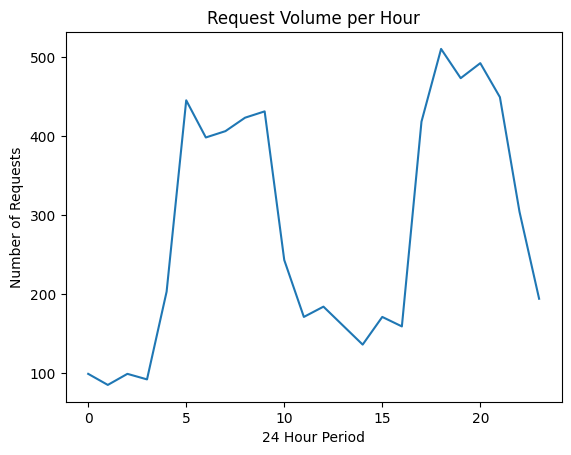

In [ ]:

#aggregate data by time intervals (hourly)

df.info()

df['req_time'] = pd.to_datetime(df['req_time'],format='%I:%M %p')

df['Hour'] = df['req_time'].dt.hour
print(df['Hour'])

#group data by hour and count request volume
req_vol_by_hr = df.groupby('Hour').size()
print(req_vol_by_hr)

#plot
req_vol_by_hr.plot(kind='line')
plt.title('Request Volume per Hour')
plt.xticks(np.arange(0,25, step = 5))
plt.xlabel('24 Hour Period')
plt.ylabel('Number of Requests')

**QUESTION 5**

Analyze the distrtibution of trip duration?
What is the average duration of trips from request time to drop off?
Give a summary statistic and visualize the distribution.

In [ ]:
df

,Request id,Pickup point,Driver id,Status,req_date,req_time,drop_date,drop_time,Day,Hour
0,619,Airport,1.0,Trip Completed,07/11/2016,1900-01-01 11:51:00,07/11/2016,01:00 PM,Monday,11
1,867,Airport,1.0,Trip Completed,07/11/2016,1900-01-01 17:57:00,07/11/2016,06:47 PM,Monday,17
2,1807,City,1.0,Trip Completed,07/12/2016,1900-01-01 09:17:00,07/12/2016,09:58 AM,Tuesday,9
3,2532,Airport,1.0,Trip Completed,07/12/2016,1900-01-01 21:08:00,07/12/2016,10:03 PM,Tuesday,21
4,3112,City,1.0,Trip Completed,07/13/2016,1900-01-01 08:33:00,07/13/2016,09:25 AM,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,07/15/2016,1900-01-01 23:49:00,NaN,NaN,Friday,23
6741,6752,Airport,NaN,No Cars Available,07/15/2016,1900-01-01 23:50:00,NaN,NaN,Friday,23
6742,6751,City,NaN,No Cars Available,07/15/2016,1900-01-01 23:52:00,NaN,NaN,Friday,23
6743,6754,City,NaN,No Cars Available,07/15/2016,1900-01-01 23:54:00,NaN,NaN,Friday,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Request id    6745 non-null   int64         
 1   Pickup point  6745 non-null   object        
 2   Driver id     4095 non-null   float64       
 3   Status        6745 non-null   object        
 4   req_date      6745 non-null   object        
 5   req_time      6745 non-null   datetime64[ns]
 6   drop_date     2831 non-null   object        
 7   drop_time     2831 non-null   object        
 8   Day           6745 non-null   object        
 9   Hour          6745 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 527.1+ KB


In [ ]:
#remove the rows with no values in req_date and put in seperate df
#did this because I had trouble with
new_df = df.dropna()

In [ ]:
df

,Request id,Pickup point,Driver id,Status,req_date,req_time,drop_date,drop_time,Day,Hour
0,619,Airport,1.0,Trip Completed,07/11/2016,1900-01-01 11:51:00,07/11/2016,01:00 PM,Monday,11
1,867,Airport,1.0,Trip Completed,07/11/2016,1900-01-01 17:57:00,07/11/2016,06:47 PM,Monday,17
2,1807,City,1.0,Trip Completed,07/12/2016,1900-01-01 09:17:00,07/12/2016,09:58 AM,Tuesday,9
3,2532,Airport,1.0,Trip Completed,07/12/2016,1900-01-01 21:08:00,07/12/2016,10:03 PM,Tuesday,21
4,3112,City,1.0,Trip Completed,07/13/2016,1900-01-01 08:33:00,07/13/2016,09:25 AM,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,07/15/2016,1900-01-01 23:49:00,NaN,NaN,Friday,23
6741,6752,Airport,NaN,No Cars Available,07/15/2016,1900-01-01 23:50:00,NaN,NaN,Friday,23
6742,6751,City,NaN,No Cars Available,07/15/2016,1900-01-01 23:52:00,NaN,NaN,Friday,23
6743,6754,City,NaN,No Cars Available,07/15/2016,1900-01-01 23:54:00,NaN,NaN,Friday,23


In [ ]:
new_df['req_date'] = pd.to_datetime(new_df['req_date'],format='%m/%d/%Y')
new_df['req_time'] = pd.to_datetime(new_df['req_time'],format='%I:%M %p')
new_df['drop_date'] = pd.to_datetime(new_df['drop_date'],format='%m/%d/%Y')
new_df['drop_time'] = pd.to_datetime(new_df['drop_time'],format='%I:%M %p')

#duration
duration = new_df['drop_time']- new_df['req_time']
print('Duration ' + str(duration))
new_df['Duration'] = duration

#import datetime
#calculate the duration of each trip in minutes
from datetime import datetime,timedelta
dur_mins = duration.dt.total_seconds()/60
print('dur_min ' + str(dur_mins))

Duration 0      0 days 01:09:00
1      0 days 00:50:00
2      0 days 00:41:00
3      0 days 00:55:00
4      0 days 00:52:00
             ...      
2826   0 days 00:41:00
2827   0 days 00:49:00
2828   0 days 00:43:00
2829   0 days 01:17:00
2830   0 days 00:49:00
Length: 2831, dtype: timedelta64[ns]
dur_min 0       69.0
1       50.0
2       41.0
3       55.0
4       52.0
        ... 
2826    41.0
2827    49.0
2828    43.0
2829    77.0
2830    49.0
Length: 2831, dtype: float64


<ipython-input-214-ad744becd486>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['req_date'] = pd.to_datetime(new_df['req_date'],format='%m/%d/%Y')
<ipython-input-214-ad744becd486>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['req_time'] = pd.to_datetime(new_df['req_time'],format='%I:%M %p')
<ipython-input-214-ad744becd486>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
#some time durations are negative becausse the time durations go over into the next day.
#create function where if duration is less than 0 (negative) If the duration is negative, it adds one day to the duration to adjust it to the correct value. This is done by adding a timedelta of one day to the duration.

def adj_dur(duration):
    if duration < timedelta(0):
        duration = duration + timedelta(days=1)
    return duration


#create a total_duration column
#apply() Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series.

new_df['total_duration'] = new_df['drop_time'] - new_df['req_time']
new_df['total_duration'] = new_df['total_duration'].apply(adj_dur)

#remove duration column

new_df = new_df.drop(columns=['Duration'])


<ipython-input-215-5316e1b43314>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['total_duration'] = new_df['drop_time'] - new_df['req_time']
<ipython-input-215-5316e1b43314>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['total_duration'] = new_df['total_duration'].apply(adj_dur)


In [ ]:
new_df

,Request id,Pickup point,Driver id,Status,req_date,req_time,drop_date,drop_time,Day,Hour,total_duration
0,619,Airport,1.0,Trip Completed,2016-07-11,1900-01-01 11:51:00,2016-07-11,1900-01-01 13:00:00,Monday,11,0 days 01:09:00
1,867,Airport,1.0,Trip Completed,2016-07-11,1900-01-01 17:57:00,2016-07-11,1900-01-01 18:47:00,Monday,17,0 days 00:50:00
2,1807,City,1.0,Trip Completed,2016-07-12,1900-01-01 09:17:00,2016-07-12,1900-01-01 09:58:00,Tuesday,9,0 days 00:41:00
3,2532,Airport,1.0,Trip Completed,2016-07-12,1900-01-01 21:08:00,2016-07-12,1900-01-01 22:03:00,Tuesday,21,0 days 00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13,1900-01-01 08:33:00,2016-07-13,1900-01-01 09:25:00,Wednesday,8,0 days 00:52:00
...,...,...,...,...,...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,2016-07-11,1900-01-01 22:54:00,2016-07-11,1900-01-01 23:35:00,Monday,22,0 days 00:41:00
2827,2924,City,300.0,Trip Completed,2016-07-13,1900-01-01 06:31:00,2016-07-13,1900-01-01 07:20:00,Wednesday,6,0 days 00:49:00
2828,3324,Airport,300.0,Trip Completed,2016-07-13,1900-01-01 12:33:00,2016-07-13,1900-01-01 13:16:00,Wednesday,12,0 days 00:43:00
2829,3935,Airport,300.0,Trip Completed,2016-07-13,1900-01-01 22:26:00,2016-07-13,1900-01-01 23:43:00,Wednesday,22,0 days 01:17:00


In [ ]:
#Print summary statistics
import statistics as stat

#avg duration
avg_duration = np.mean(dur_mins)
print('Average Duration: ' + str(round((avg_duration),2)))

#median duration
med_duration = np.median(dur_mins)
print('Median: ' +str(med_duration))

#mode duration
mode_duration = stat.mode(dur_mins)
print('Mode: ' +str(mode_duration))


#standard deviation
std = stat.stdev(dur_mins)
print('Standard Deviation: ' + str(round((std))))

Average Duration: 2.56
Median: 51.0
Mode: 59.0
Standard Deviation: 263


Text(0, 0.5, 'Frequency')

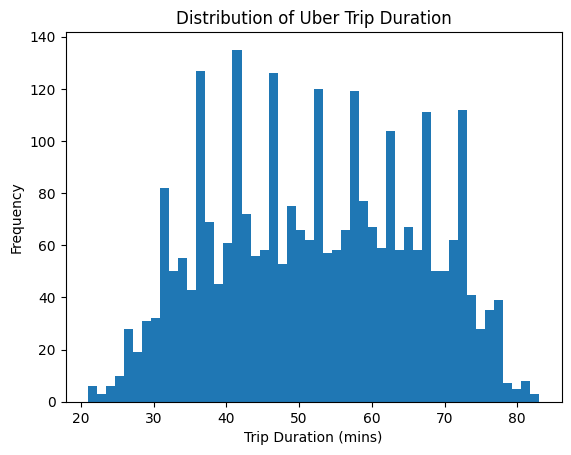

In [ ]:
#plot distribution of duration
plt.hist(new_df['total_duration'].dt.total_seconds() / 60, bins=50)  # Convert timedelta to minutes for plotting. #chose how many bins by dividing
plt.title('Distribution of Uber Trip Duration')
plt.xlabel('Trip Duration (mins)')
plt.ylabel('Frequency')

**QUESTION 6**

What is the correlation between variables?

In [ ]:
#double check if the status column is categorical, Check Data: Examine the data in the 'Status' column to ensure that it contains categorical values that can be encoded. Look for unexpected values or missing data that might affect the encoding process. Status encoded originally came up blank. It had only Trip completed. I removed the other two sttuses because they involved null values for the frop time for the previous question, now i will need to use the orignal data frame to avoid this issue.
print(df['Status'].unique())

['Trip Completed' 'Cancelled' 'No Cars Available']


0       2
1       2
2       2
3       2
4       2
       ..
6740    1
6741    1
6742    1
6743    1
6744    1
Name: status_encoded, Length: 6745, dtype: int64
0       0
1       0
2       1
3       0
4       1
       ..
6740    1
6741    0
6742    1
6743    1
6744    0
Name: pickup_point_encoded, Length: 6745, dtype: int64


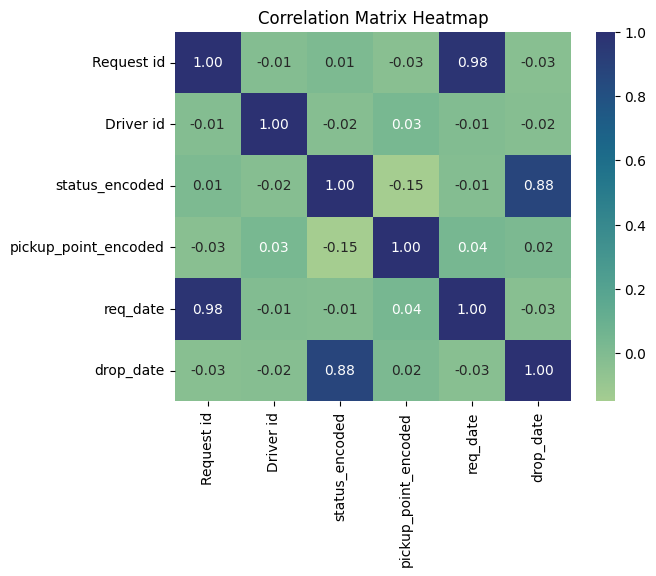

In [ ]:
df['req_date'] = pd.to_datetime(df['req_date'],format='%m/%d/%Y')
df['req_time'] = pd.to_datetime(df['req_time'],format='%I:%M %p')
df['drop_date'] = pd.to_datetime(df['drop_date'],format='%m/%d/%Y')
df['drop_time'] = pd.to_datetime(df['drop_time'],format='%I:%M %p')

#turn string categories to numbers by importing labelencoder
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
df['status_encoded'] = le.fit_transform(df['Status'])
print(df['status_encoded'])
df['pickup_point_encoded'] = le.fit_transform(df['Pickup point'])
print(df['pickup_point_encoded'])

#convert datetime to series to be in matrix
df['req_date'] = pd.to_datetime(df['req_date'],format='%m/%d/%Y')
df['drop_date'] = pd.to_datetime(df['drop_date'],format='%m/%d/%Y')


# Calculate correlation matrix including the extracted features
correlation_matrix = df[['Request id','Driver id', 'status_encoded', 'pickup_point_encoded', 'req_date','drop_date']].corr(numeric_only=False)

#plot heat map
sns.color_palette("crest", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Strongest correlations:**

Status_encoded,drop_hour 0.73

status_encoded,drop_date 0.88

Req id,req_date 0.98


**Weakest correlation:**

req_hr,pickup_point -0.38

status_encoded, pickup_point -0.15